In [18]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
data_path = "data/Spotify_Youtube.csv"
data = pd.read_csv(data_path)

In [16]:
features = data[["Liveness", "Energy", "Loudness"]]

In [17]:
features.head()

,Liveness,Energy,Loudness
0,0.6130,0.705,-6.679
1,0.0463,0.703,-5.815
2,0.1160,0.923,-3.930
3,0.0640,0.739,-5.810
4,0.0698,0.694,-8.627


## find the optimal number of K using elbow graph

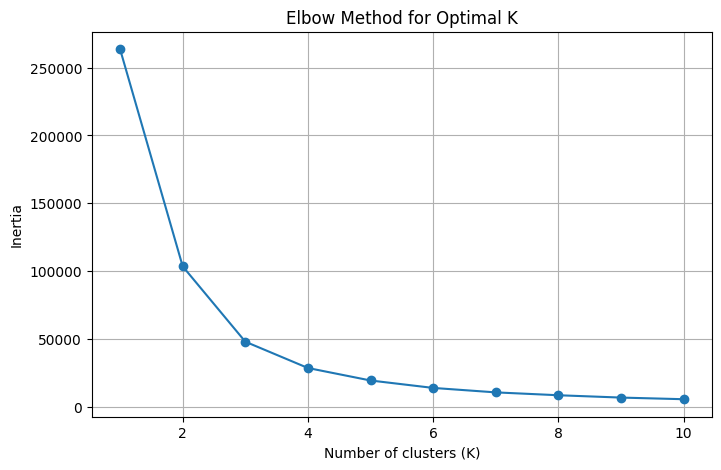

In [20]:
# Elbow method to find optimal K
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

## visualize the data and groups based on that K

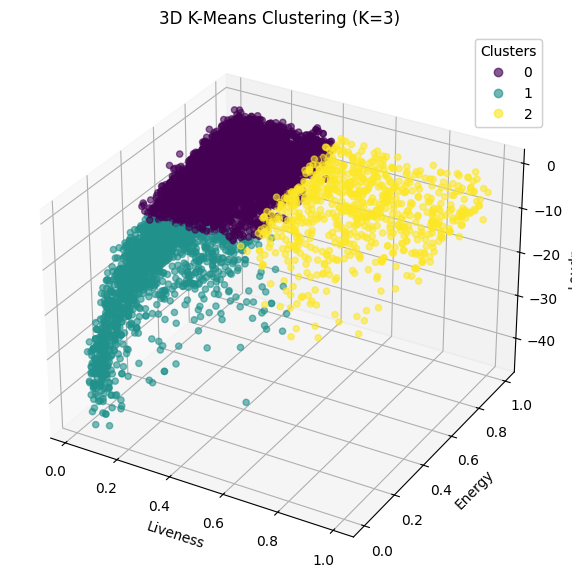

In [36]:
# Using K=3 based on elbow method
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

features.loc[:, 'Cluster'] = clusters

# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    features['Liveness'],
    features['Energy'],
    features['Loudness'],
    c=features['Cluster'],
    cmap='viridis',
    s=20,
    alpha=0.6
)

ax.set_xlabel('Liveness')
ax.set_ylabel('Energy')
ax.set_zlabel('Loudness')
ax.set_title('3D K-Means Clustering (K=3)')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()

* Cluster 0 might contain songs with medium energy and loudness but low liveness — possibly more studio-produced tracks.
* Cluster 1 could consist of quieter or lower-energy tracks — perhaps acoustic, mellow, or lo-fi music.
* Cluster 2 may represent high-energy, loud, and lively songs — likely live performances or intense genres.

## take each of the individual columns and run hierarchical clustering on them

In [39]:
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [41]:
# Function to perform and plot hierarchical clustering for a single feature
def hierarchical_clustering(df, feature_name):
    data = df[[feature_name]].dropna()
    linked = linkage(data, method='ward')

    plt.figure(figsize=(10, 5))
    dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=False)
    plt.title(f'Hierarchical Clustering Dendrogram for {feature_name}')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

    # Create flat clusters using a threshold
    max_d = 10
    clusters = fcluster(linked, max_d, criterion='distance')
    data['Cluster'] = clusters

    # Plot the distribution of clusters
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=feature_name, hue='Cluster', bins=30, palette='Set2', kde=True)
    plt.title(f'{feature_name} Clusters')
    plt.xlabel(feature_name)
    plt.ylabel('Count')
    plt.show()

    return data

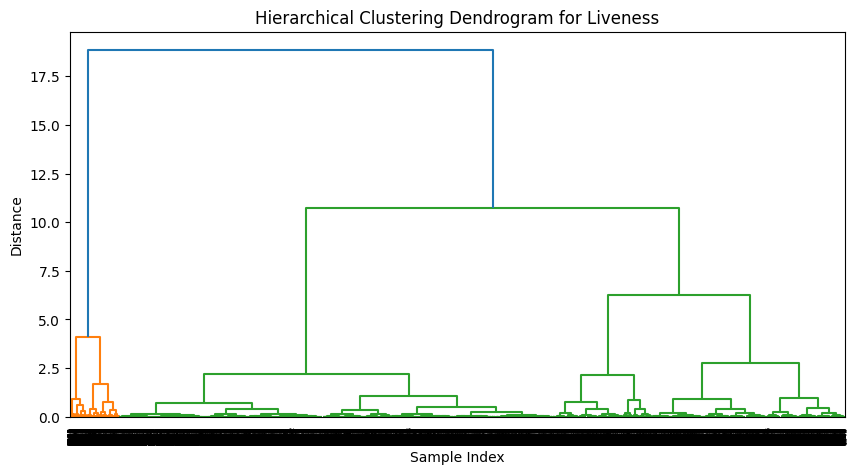

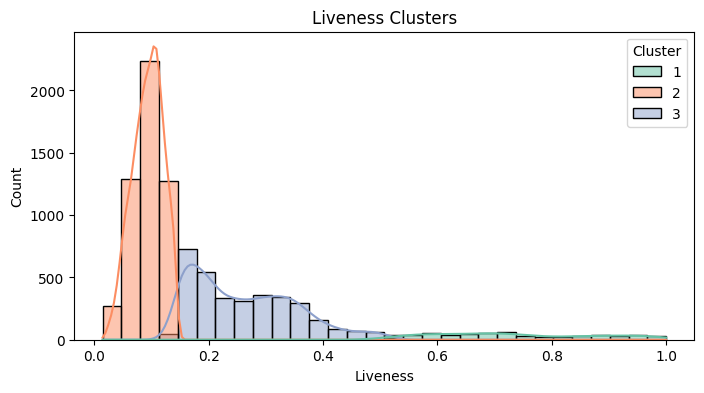

In [42]:
# Perform clustering for Liveness, Energy, and Loudness
cluster_liveness = hierarchical_clustering(features, 'Liveness')

Finding:
* The dendrogram and histogram show that the songs have been grouped into 3 clusters based on their Liveness.
    *  Cluster 2 (orange): Very low liveness values (near 0.1 or below). These are likely studio-recorded tracks with no live elements — clean production, often pop, electronic, or radio-ready songs.
    * Cluster 3 (blue): Moderate liveness (roughly 0.1 to 0.4). Might include songs that are partially live or have background crowd noise, such as live acoustic sets or songs with concert effects.
    * Cluster 1 (green): High liveness (above 0.4, reaching up to 1.0). These tracks likely come from live performances, recordings of concerts, or tracks intentionally mixed to feel live — perhaps rock shows, festival sets, or acoustic sessions.
* The vast majority of tracks fall into Cluster 2 and Cluster 3, meaning most songs are either clearly studio or moderately lively.

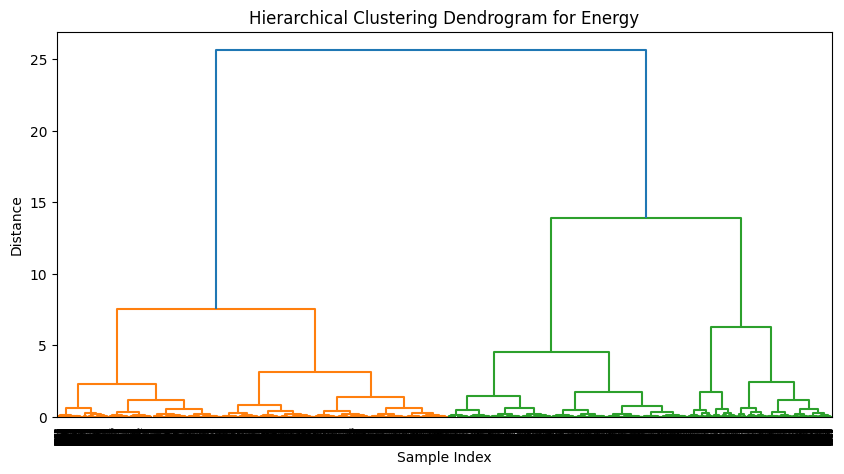

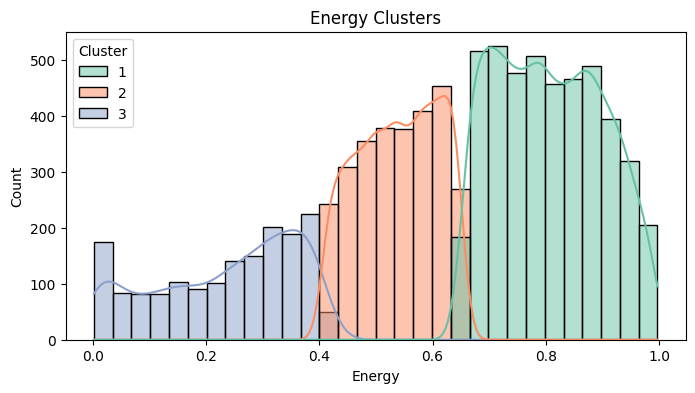

In [43]:
cluster_energy = hierarchical_clustering(features, 'Energy')

Findings
* The clustering algorithm grouped the songs into three clusters
    * Cluster 3 (blue): Songs with low energy (0.0 to ~0.45). Likely to be chill, mellow, or acoustic tracks — possibly lo-fi, indie, ambient, or soft ballads.
    * Cluster 2 (orange): Moderate energy songs (~0.45 to ~0.65). This might represent mid-tempo pop, R&B, or laid-back hip-hop — tracks with a steady groove but not overly intense.
    * Cluster 1 (green): High energy tracks (~0.65 to 1.0). Includes upbeat and intense songs like EDM, rock, rap, or dance-pop — possibly high-BPM, loud, and fast.

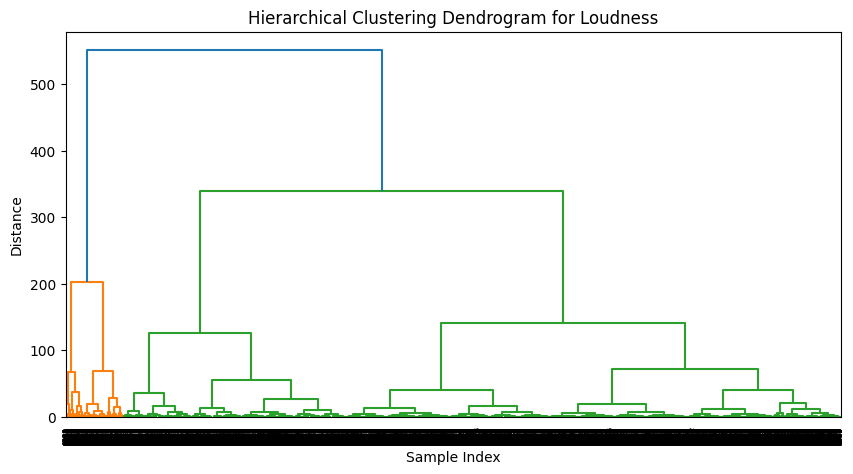

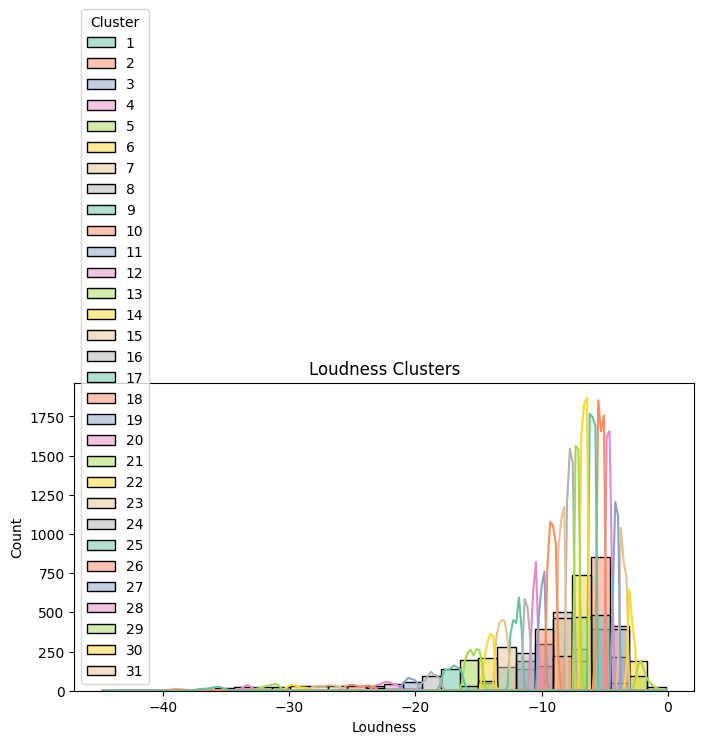

In [44]:
cluster_loudness = hierarchical_clustering(features, 'Loudness')

Finding:
* The dendrogram and histogram show that the algorithm has produced over 30 distinct clusters
    * The natural variation in loudness is subtle, causing the model to form many micro-clusters
* The histogram shows that most of the data is clustered between -12 dB and -4 dB, which is typical for modern music mastering — loud, polished, and radio-ready.
* A few songs are much quieter, ranging from -20 dB to even -40 dB